# Plot Experiment (single)

## Importing section

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import os

## Load data

In [51]:
# loading_csv_path = "results/rs_ptree/default/final/rank2_7243235e.csv"
# loading_csv_path = "results/ba_ptree/edge/rwse_default/final/rank1_2b76b26e.csv"
# loading_csv_path = "results/br_ptree/edge/default_rwse/final/rank1_57285ad6_results.csv"
# loading_csv_path = "results/ez_ptree/edge/cistrans/final/rank2_d22063d2.csv"
# loading_csv_path = "results/tox21_ptree/edge/cistrans/final/rank1_21dfea0c.csv"
# loading_csv_path = "results/bace_ptree/edge/default_rwse/final_hp-ray/rank3_b3c6ee6a.csv"
loading_csv_path = "results/mc_ptree/edge/dia_advanced/final/rank2_c3185b63.csv"

figure_path = os.path.join(loading_csv_path.split(".csv")[0] + ".pdf")

In [52]:
# load csv
df = pd.read_csv(loading_csv_path)
display(df)

,train_accuracy,train_precision,train_recall,train_f1,train_auc,train_mean_loss,train_sum_loss,val_accuracy,val_precision,val_recall,...,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/model/hidden_dimension,config/model/modules/1/parameter/dropout,config/model/modules/1/times,config/optimizer/base_learning_rate
0,0.49827,0.48889,0.30769,0.37768,0.47581,1.315436,24.993275,0.5,0.5,0.27273,...,5.742717,8056,AT-MB-PC-E13,127.0.0.1,5.742717,1,64,0.5,1,0.001
1,0.48443,0.46629,0.29021,0.35776,0.48394,0.890575,16.920927,0.5,0.5,0.31818,...,12.871672,8056,AT-MB-PC-E13,127.0.0.1,12.871672,2,64,0.5,1,0.001
2,0.48962,0.48364,0.46503,0.47415,0.46096,0.785552,14.925497,0.5,0.5,0.63636,...,19.368911,8056,AT-MB-PC-E13,127.0.0.1,19.368911,3,64,0.5,1,0.001
3,0.50519,0.50000,0.36364,0.42105,0.48776,0.745098,14.156871,0.5,0.5,0.22727,...,26.541857,8056,AT-MB-PC-E13,127.0.0.1,26.541857,4,64,0.5,1,0.001
4,0.51557,0.51364,0.39510,0.44664,0.50150,0.736621,13.995805,0.5,0.5,0.22727,...,33.481712,8056,AT-MB-PC-E13,127.0.0.1,33.481712,5,64,0.5,1,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.52422,0.53216,0.31818,0.39825,0.53117,0.691823,13.144628,0.5,0.5,0.95455,...,631.532881,8056,AT-MB-PC-E13,127.0.0.1,631.532881,96,64,0.5,1,0.001
96,0.47059,0.43506,0.23427,0.30455,0.48654,0.693230,13.171364,0.5,0.5,0.95455,...,638.339229,8056,AT-MB-PC-E13,127.0.0.1,638.339229,97,64,0.5,1,0.001
97,0.50173,0.49324,0.25524,0.33641,0.51054,0.691784,13.143888,0.5,0.5,0.95455,...,644.454635,8056,AT-MB-PC-E13,127.0.0.1,644.454635,98,64,0.5,1,0.001
98,0.50346,0.49718,0.30769,0.38013,0.50154,0.695380,13.212222,0.5,0.5,0.95455,...,651.308699,8056,AT-MB-PC-E13,127.0.0.1,651.308699,99,64,0.5,1,0.001


## Define properties of graph

In [53]:
# data to plot
plot_left_axis = [
    'auc',
    'mae',
    'r2',
    'ranking_accuracy_0.3'
]
plot_right_axis = [
    'mean_loss',
]

In [54]:
# which data split modes to plot
plot_splits = [
    'train',
    # 'val',
    'test',
]

## Create plot

In [55]:
def string_splitter(s: str):
    t = s.split("_")
    r = t[0]
    for elem in t[1:]:
        r += " " + elem
    return r

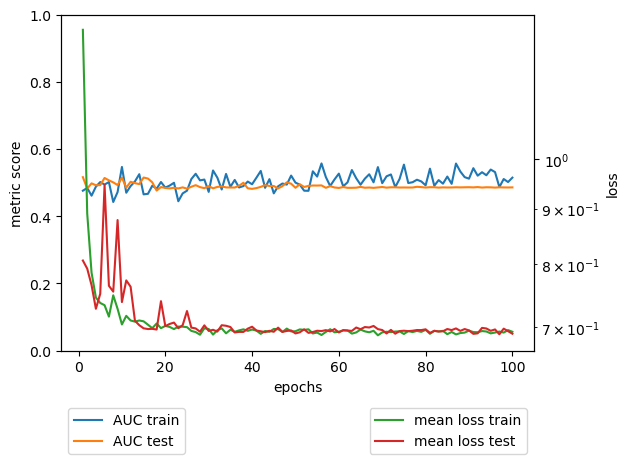

In [56]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

colors = iter(mcolors.TABLEAU_COLORS.values())

# plot left axis
for metric in plot_left_axis:
    # plot every specified split
    for split in plot_splits:
        # plot data on first axis
        if f"{split}_{metric}" in df:
            ax1.plot(df.index+1, df[f"{split}_{metric}"], label=f"{metric.upper()} {split}", color=next(colors))

# plot right axis
for metric in plot_right_axis:
    # plot every specified split
    for split in plot_splits:
        # plot data on first axis
        ax2.plot(df.index + 1, df[f"{split}_{metric}"], label=f"{string_splitter(metric)} {split}", color=next(colors))

# labels and legend
ax1.set_ylabel("metric score")
ax1.set_xlabel("epochs")
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15))
ax1.set_ylim(0,1)

ax2.set_ylabel("loss")
ax2.set_yscale('log')
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15))
# plt.title("Final test metrics and loss plot")

plt.tight_layout()
plt.savefig(figure_path)
plt.show()